**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')

**Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
seed = 42

**Load DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/MPHARM/00_MPH/Final/I_RFR.xlsx")
df

,pIC50,ATS5m,ATSC8p,AATSC0m,AATSC6m,AATSC1v,AATSC2i,AATSC7i,MATS4c,MATS1s,...,LipoaffinityIndex,CIC1,MDEO-12,MDEO-22,R_TpiPCTPC,JGI8,TopoPSA,MWC9,SRW10,WTPT-5
0,4.004892,2575.023934,1.107964,56.191728,-20.622838,3.269953,-0.144567,-0.015331,0.102676,-0.048709,...,3.581582,1.386639,0.000000,0.0,10.926349,0.020408,46.17,10.115327,9.259226,2.956971
1,3.420102,2736.475463,-3.396336,54.782903,-22.807983,1.118836,0.092532,0.337232,0.081823,-0.046691,...,3.164107,1.146284,0.000000,0.0,11.644937,0.019087,71.80,10.227200,9.381180,2.957234
2,3.468904,2791.106667,1.100058,55.852402,-27.295205,3.190507,-0.273520,-0.881784,0.060469,-0.038553,...,4.030049,1.029030,0.000000,0.0,11.062948,0.019087,46.17,10.227200,9.381180,2.957234
3,3.806041,3522.643790,0.552069,272.626892,-58.056284,3.083220,-0.089732,0.361523,0.079322,-0.044059,...,3.757093,1.029030,0.000000,0.0,11.062948,0.019087,46.17,10.227200,9.381180,2.957234
4,4.070837,4541.317714,1.243235,100.907285,-29.250764,3.013628,-0.105451,0.067094,0.111316,-0.039628,...,3.758810,0.893090,0.000000,0.0,10.919686,0.019087,46.17,10.392160,9.541441,2.957015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,5.044312,7997.342023,-0.351332,53.588858,-0.803367,0.435758,-0.122017,0.139444,-0.022525,0.019911,...,3.690436,1.368872,0.436790,0.0,10.884857,0.013289,168.80,11.389774,10.363030,15.981493
103,4.274088,9348.022433,7.257542,55.673651,-1.238428,0.264935,0.821502,-0.983814,-0.022255,-0.054822,...,6.889063,1.500238,0.250000,0.0,10.499625,0.009353,125.66,11.463809,10.456769,12.946934
104,6.677781,9836.142316,1.701283,54.243826,8.107587,0.532604,-0.012958,0.130762,0.126789,-0.041637,...,6.369282,1.762428,0.408248,0.0,10.070914,0.012815,149.13,11.499952,10.470022,16.218559
105,4.486782,9231.998807,0.581452,65.923485,4.438507,0.374193,-0.109849,0.166655,-0.023256,0.023460,...,3.546778,1.151446,0.472470,0.0,10.629123,0.009093,168.80,11.455985,10.430255,15.982096


In [ ]:
print(df.columns)

Index(['pIC50', 'ATS5m', 'ATSC8p', 'AATSC0m', 'AATSC6m', 'AATSC1v', 'AATSC2i',
       'AATSC7i', 'MATS4c', 'MATS1s', 'GATS4v', 'GATS3e', 'GATS3s', 'VR3_DzZ',
       'VR3_Dzm', 'VR3_Dzp', 'VE1_Dzi', 'SpMax5_Bhm', 'SpMax6_Bhm',
       'SpMax1_Bhv', 'SpMin1_Bhv', 'SpMin5_Bhv', 'SpMax6_Bhe', 'SpMax1_Bhp',
       'SpMax4_Bhp', 'SpMin8_Bhp', 'SpMax1_Bhi', 'SpMax4_Bhi', 'SpMax6_Bhi',
       'SpMin4_Bhs', 'SpMin5_Bhs', 'CrippenLogP', 'CrippenMR', 'VR3_Dt',
       'SaaN', 'SsssN', 'SsCl', 'minHBa', 'minHCsats', 'maxaaN', 'hmin',
       'LipoaffinityIndex', 'CIC1', 'MDEO-12', 'MDEO-22', 'R_TpiPCTPC', 'JGI8',
       'TopoPSA', 'MWC9', 'SRW10', 'WTPT-5'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pIC50              107 non-null    float64
 1   ATS5m              107 non-null    float64
 2   ATSC8p             107 non-null    float64
 3   AATSC0m            107 non-null    float64
 4   AATSC6m            107 non-null    float64
 5   AATSC1v            107 non-null    float64
 6   AATSC2i            107 non-null    float64
 7   AATSC7i            107 non-null    float64
 8   MATS4c             107 non-null    float64
 9   MATS1s             107 non-null    float64
 10  GATS4v             107 non-null    float64
 11  GATS3e             107 non-null    float64
 12  GATS3s             107 non-null    float64
 13  VR3_DzZ            107 non-null    float64
 14  VR3_Dzm            107 non-null    float64
 15  VR3_Dzp            107 non-null    float64
 16  VE1_Dzi            107 non

**Checking for Null Values**

In [ ]:
df.isnull()

,pIC50,ATS5m,ATSC8p,AATSC0m,AATSC6m,AATSC1v,AATSC2i,AATSC7i,MATS4c,MATS1s,...,LipoaffinityIndex,CIC1,MDEO-12,MDEO-22,R_TpiPCTPC,JGI8,TopoPSA,MWC9,SRW10,WTPT-5
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

pIC50                0
ATS5m                0
ATSC8p               0
AATSC0m              0
AATSC6m              0
AATSC1v              0
AATSC2i              0
AATSC7i              0
MATS4c               0
MATS1s               0
GATS4v               0
GATS3e               0
GATS3s               0
VR3_DzZ              0
VR3_Dzm              0
VR3_Dzp              0
VE1_Dzi              0
SpMax5_Bhm           0
SpMax6_Bhm           0
SpMax1_Bhv           0
SpMin1_Bhv           0
SpMin5_Bhv           0
SpMax6_Bhe           0
SpMax1_Bhp           0
SpMax4_Bhp           0
SpMin8_Bhp           0
SpMax1_Bhi           0
SpMax4_Bhi           0
SpMax6_Bhi           0
SpMin4_Bhs           0
SpMin5_Bhs           0
CrippenLogP          0
CrippenMR            0
VR3_Dt               0
SaaN                 0
SsssN                0
SsCl                 0
minHBa               0
minHCsats            0
maxaaN               0
hmin                 0
LipoaffinityIndex    0
CIC1                 0
MDEO-12    

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df2 = df.fillna(value = 0) 
df2

,pIC50,ATS5m,ATSC8p,AATSC0m,AATSC6m,AATSC1v,AATSC2i,AATSC7i,MATS4c,MATS1s,...,LipoaffinityIndex,CIC1,MDEO-12,MDEO-22,R_TpiPCTPC,JGI8,TopoPSA,MWC9,SRW10,WTPT-5
0,4.004892,2575.023934,1.107964,56.191728,-20.622838,3.269953,-0.144567,-0.015331,0.102676,-0.048709,...,3.581582,1.386639,0.000000,0.0,10.926349,0.020408,46.17,10.115327,9.259226,2.956971
1,3.420102,2736.475463,-3.396336,54.782903,-22.807983,1.118836,0.092532,0.337232,0.081823,-0.046691,...,3.164107,1.146284,0.000000,0.0,11.644937,0.019087,71.80,10.227200,9.381180,2.957234
2,3.468904,2791.106667,1.100058,55.852402,-27.295205,3.190507,-0.273520,-0.881784,0.060469,-0.038553,...,4.030049,1.029030,0.000000,0.0,11.062948,0.019087,46.17,10.227200,9.381180,2.957234
3,3.806041,3522.643790,0.552069,272.626892,-58.056284,3.083220,-0.089732,0.361523,0.079322,-0.044059,...,3.757093,1.029030,0.000000,0.0,11.062948,0.019087,46.17,10.227200,9.381180,2.957234
4,4.070837,4541.317714,1.243235,100.907285,-29.250764,3.013628,-0.105451,0.067094,0.111316,-0.039628,...,3.758810,0.893090,0.000000,0.0,10.919686,0.019087,46.17,10.392160,9.541441,2.957015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,5.044312,7997.342023,-0.351332,53.588858,-0.803367,0.435758,-0.122017,0.139444,-0.022525,0.019911,...,3.690436,1.368872,0.436790,0.0,10.884857,0.013289,168.80,11.389774,10.363030,15.981493
103,4.274088,9348.022433,7.257542,55.673651,-1.238428,0.264935,0.821502,-0.983814,-0.022255,-0.054822,...,6.889063,1.500238,0.250000,0.0,10.499625,0.009353,125.66,11.463809,10.456769,12.946934
104,6.677781,9836.142316,1.701283,54.243826,8.107587,0.532604,-0.012958,0.130762,0.126789,-0.041637,...,6.369282,1.762428,0.408248,0.0,10.070914,0.012815,149.13,11.499952,10.470022,16.218559
105,4.486782,9231.998807,0.581452,65.923485,4.438507,0.374193,-0.109849,0.166655,-0.023256,0.023460,...,3.546778,1.151446,0.472470,0.0,10.629123,0.009093,168.80,11.455985,10.430255,15.982096


In [ ]:
df2.isnull().sum().sum()

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pIC50              107 non-null    float64
 1   ATS5m              107 non-null    float64
 2   ATSC8p             107 non-null    float64
 3   AATSC0m            107 non-null    float64
 4   AATSC6m            107 non-null    float64
 5   AATSC1v            107 non-null    float64
 6   AATSC2i            107 non-null    float64
 7   AATSC7i            107 non-null    float64
 8   MATS4c             107 non-null    float64
 9   MATS1s             107 non-null    float64
 10  GATS4v             107 non-null    float64
 11  GATS3e             107 non-null    float64
 12  GATS3s             107 non-null    float64
 13  VR3_DzZ            107 non-null    float64
 14  VR3_Dzm            107 non-null    float64
 15  VR3_Dzp            107 non-null    float64
 16  VE1_Dzi            107 non

In [ ]:
df2.describe()

,pIC50,ATS5m,ATSC8p,AATSC0m,AATSC6m,AATSC1v,AATSC2i,AATSC7i,MATS4c,MATS1s,...,LipoaffinityIndex,CIC1,MDEO-12,MDEO-22,R_TpiPCTPC,JGI8,TopoPSA,MWC9,SRW10,WTPT-5
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,4.216168,8964.516701,0.245716,68.973974,-6.283709,0.860147,-0.106985,-0.005427,-0.079304,-0.023016,...,6.935045,1.731105,0.166539,0.067228,9.967638,0.011118,106.578879,11.194762,10.234730,10.779435
std,0.725320,2179.163700,3.319942,50.382806,11.511768,0.992438,0.202802,0.220002,0.120647,0.027361,...,2.242733,0.433812,0.278702,0.175481,4.189731,0.002637,32.239599,0.288407,0.261012,3.829500
min,3.301030,2575.023934,-6.857002,40.602673,-58.056284,-1.849515,-0.456449,-0.983814,-0.296763,-0.077915,...,3.071848,0.893090,0.000000,0.000000,4.830305,0.006006,37.380000,10.115327,9.259226,2.956971
25%,3.733644,8177.669125,-1.696777,52.375448,-11.208183,0.315812,-0.249601,-0.094395,-0.189111,-0.041464,...,5.618972,1.373503,0.000000,0.000000,7.719470,0.009592,99.630000,11.174244,10.213652,9.619914
50%,4.069153,9012.344147,0.508216,55.822948,-4.730349,0.969420,-0.123578,0.023440,-0.032076,-0.027552,...,6.264584,1.632080,0.000000,0.000000,8.808830,0.010624,107.610000,11.259052,10.310917,9.756093
75%,4.489463,10032.504954,2.975239,66.911484,-0.265521,1.514283,0.025675,0.120105,0.012887,0.000372,...,8.420266,2.175629,0.305938,0.000000,10.695948,0.012304,127.190000,11.355953,10.374925,13.277854
max,6.677781,13123.665360,8.394998,429.304391,36.830568,3.269953,0.821502,0.393839,0.192113,0.031913,...,12.085058,2.748119,1.485864,0.908560,19.744189,0.020408,172.810000,11.519653,10.577783,19.039379


In [ ]:
df2.head()

,pIC50,ATS5m,ATSC8p,AATSC0m,AATSC6m,AATSC1v,AATSC2i,AATSC7i,MATS4c,MATS1s,...,LipoaffinityIndex,CIC1,MDEO-12,MDEO-22,R_TpiPCTPC,JGI8,TopoPSA,MWC9,SRW10,WTPT-5
0,4.004892,2575.023934,1.107964,56.191728,-20.622838,3.269953,-0.144567,-0.015331,0.102676,-0.048709,...,3.581582,1.386639,0.0,0.0,10.926349,0.020408,46.17,10.115327,9.259226,2.956971
1,3.420102,2736.475463,-3.396336,54.782903,-22.807983,1.118836,0.092532,0.337232,0.081823,-0.046691,...,3.164107,1.146284,0.0,0.0,11.644937,0.019087,71.80,10.227200,9.381180,2.957234
2,3.468904,2791.106667,1.100058,55.852402,-27.295205,3.190507,-0.273520,-0.881784,0.060469,-0.038553,...,4.030049,1.029030,0.0,0.0,11.062948,0.019087,46.17,10.227200,9.381180,2.957234
3,3.806041,3522.643790,0.552069,272.626892,-58.056284,3.083220,-0.089732,0.361523,0.079322,-0.044059,...,3.757093,1.029030,0.0,0.0,11.062948,0.019087,46.17,10.227200,9.381180,2.957234
4,4.070837,4541.317714,1.243235,100.907285,-29.250764,3.013628,-0.105451,0.067094,0.111316,-0.039628,...,3.758810,0.893090,0.0,0.0,10.919686,0.019087,46.17,10.392160,9.541441,2.957015


In [ ]:
df2.describe()

,pIC50,ATS5m,ATSC8p,AATSC0m,AATSC6m,AATSC1v,AATSC2i,AATSC7i,MATS4c,MATS1s,...,LipoaffinityIndex,CIC1,MDEO-12,MDEO-22,R_TpiPCTPC,JGI8,TopoPSA,MWC9,SRW10,WTPT-5
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,4.216168,8964.516701,0.245716,68.973974,-6.283709,0.860147,-0.106985,-0.005427,-0.079304,-0.023016,...,6.935045,1.731105,0.166539,0.067228,9.967638,0.011118,106.578879,11.194762,10.234730,10.779435
std,0.725320,2179.163700,3.319942,50.382806,11.511768,0.992438,0.202802,0.220002,0.120647,0.027361,...,2.242733,0.433812,0.278702,0.175481,4.189731,0.002637,32.239599,0.288407,0.261012,3.829500
min,3.301030,2575.023934,-6.857002,40.602673,-58.056284,-1.849515,-0.456449,-0.983814,-0.296763,-0.077915,...,3.071848,0.893090,0.000000,0.000000,4.830305,0.006006,37.380000,10.115327,9.259226,2.956971
25%,3.733644,8177.669125,-1.696777,52.375448,-11.208183,0.315812,-0.249601,-0.094395,-0.189111,-0.041464,...,5.618972,1.373503,0.000000,0.000000,7.719470,0.009592,99.630000,11.174244,10.213652,9.619914
50%,4.069153,9012.344147,0.508216,55.822948,-4.730349,0.969420,-0.123578,0.023440,-0.032076,-0.027552,...,6.264584,1.632080,0.000000,0.000000,8.808830,0.010624,107.610000,11.259052,10.310917,9.756093
75%,4.489463,10032.504954,2.975239,66.911484,-0.265521,1.514283,0.025675,0.120105,0.012887,0.000372,...,8.420266,2.175629,0.305938,0.000000,10.695948,0.012304,127.190000,11.355953,10.374925,13.277854
max,6.677781,13123.665360,8.394998,429.304391,36.830568,3.269953,0.821502,0.393839,0.192113,0.031913,...,12.085058,2.748119,1.485864,0.908560,19.744189,0.020408,172.810000,11.519653,10.577783,19.039379


**Input and Output Preparation**

In [ ]:
X = df2.drop(['pIC50'],axis = 1)
X

,ATS5m,ATSC8p,AATSC0m,AATSC6m,AATSC1v,AATSC2i,AATSC7i,MATS4c,MATS1s,GATS4v,...,LipoaffinityIndex,CIC1,MDEO-12,MDEO-22,R_TpiPCTPC,JGI8,TopoPSA,MWC9,SRW10,WTPT-5
0,2575.023934,1.107964,56.191728,-20.622838,3.269953,-0.144567,-0.015331,0.102676,-0.048709,0.958414,...,3.581582,1.386639,0.000000,0.0,10.926349,0.020408,46.17,10.115327,9.259226,2.956971
1,2736.475463,-3.396336,54.782903,-22.807983,1.118836,0.092532,0.337232,0.081823,-0.046691,1.004031,...,3.164107,1.146284,0.000000,0.0,11.644937,0.019087,71.80,10.227200,9.381180,2.957234
2,2791.106667,1.100058,55.852402,-27.295205,3.190507,-0.273520,-0.881784,0.060469,-0.038553,1.031868,...,4.030049,1.029030,0.000000,0.0,11.062948,0.019087,46.17,10.227200,9.381180,2.957234
3,3522.643790,0.552069,272.626892,-58.056284,3.083220,-0.089732,0.361523,0.079322,-0.044059,1.135037,...,3.757093,1.029030,0.000000,0.0,11.062948,0.019087,46.17,10.227200,9.381180,2.957234
4,4541.317714,1.243235,100.907285,-29.250764,3.013628,-0.105451,0.067094,0.111316,-0.039628,1.147575,...,3.758810,0.893090,0.000000,0.0,10.919686,0.019087,46.17,10.392160,9.541441,2.957015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,7997.342023,-0.351332,53.588858,-0.803367,0.435758,-0.122017,0.139444,-0.022525,0.019911,0.995824,...,3.690436,1.368872,0.436790,0.0,10.884857,0.013289,168.80,11.389774,10.363030,15.981493
103,9348.022433,7.257542,55.673651,-1.238428,0.264935,0.821502,-0.983814,-0.022255,-0.054822,0.952013,...,6.889063,1.500238,0.250000,0.0,10.499625,0.009353,125.66,11.463809,10.456769,12.946934
104,9836.142316,1.701283,54.243826,8.107587,0.532604,-0.012958,0.130762,0.126789,-0.041637,1.067687,...,6.369282,1.762428,0.408248,0.0,10.070914,0.012815,149.13,11.499952,10.470022,16.218559
105,9231.998807,0.581452,65.923485,4.438507,0.374193,-0.109849,0.166655,-0.023256,0.023460,1.029023,...,3.546778,1.151446,0.472470,0.0,10.629123,0.009093,168.80,11.455985,10.430255,15.982096


In [ ]:
Y = df2.pIC50
Y

0      4.004892
1      3.420102
2      3.468904
3      3.806041
4      4.070837
         ...   
102    5.044312
103    4.274088
104    6.677781
105    4.486782
106    4.922269
Name: pIC50, Length: 107, dtype: float64

In [ ]:
X.shape

(107, 50)

In [ ]:
Y.shape

(107,)

In [ ]:
corr = X.corr()

In [ ]:
corr

,ATS5m,ATSC8p,AATSC0m,AATSC6m,AATSC1v,AATSC2i,AATSC7i,MATS4c,MATS1s,GATS4v,...,LipoaffinityIndex,CIC1,MDEO-12,MDEO-22,R_TpiPCTPC,JGI8,TopoPSA,MWC9,SRW10,WTPT-5
ATS5m,1.000000,0.249755,-0.201860,0.544988,-0.318058,-0.101917,0.130328,-0.451843,0.298806,-0.197088,...,0.599873,0.662875,0.340585,0.048619,-0.134148,-0.532037,0.612855,0.875219,0.871527,0.674701
ATSC8p,0.249755,1.000000,-0.064148,-0.193549,0.000963,0.170666,-0.402760,-0.593381,0.105408,0.131096,...,-0.067371,-0.103086,0.118717,-0.104757,-0.716996,0.173244,0.238236,0.073775,0.072781,-0.098149
AATSC0m,-0.201860,-0.064148,1.000000,-0.043990,0.189025,-0.068099,0.125242,0.145448,0.089900,0.079473,...,-0.162784,-0.190227,-0.207693,-0.160522,-0.047694,0.082239,-0.216508,-0.286235,-0.296555,-0.256211
AATSC6m,0.544988,-0.193549,-0.043990,1.000000,-0.310957,-0.109000,0.193354,0.037562,0.254299,-0.225465,...,0.416546,0.476211,0.260835,0.192558,0.155949,-0.638519,0.321006,0.655002,0.640232,0.541526
AATSC1v,-0.318058,0.000963,0.189025,-0.310957,1.000000,-0.325147,-0.006484,-0.158191,-0.094890,0.094148,...,-0.134127,-0.204481,-0.748001,-0.677319,0.066775,0.303483,-0.163747,-0.392638,-0.385486,-0.303630
AATSC2i,-0.101917,0.170666,-0.068099,-0.109000,-0.325147,1.000000,-0.230407,-0.005228,-0.542471,0.325699,...,-0.249120,-0.258628,0.464781,0.290468,-0.096629,0.222967,-0.074436,-0.029265,0.014758,-0.295684
AATSC7i,0.130328,-0.402760,0.125242,0.193354,-0.006484,-0.230407,1.000000,0.220573,0.188620,-0.205949,...,0.139393,0.343960,0.041421,0.110962,0.173985,-0.304487,0.032283,0.087730,0.057021,0.199742
MATS4c,-0.451843,-0.593381,0.145448,0.037562,-0.158191,-0.005228,0.220573,1.000000,-0.021663,-0.113971,...,-0.207962,-0.113082,0.165935,0.250207,0.451209,-0.024990,-0.402201,-0.335452,-0.351547,-0.161808
MATS1s,0.298806,0.105408,0.089900,0.254299,-0.094890,-0.542471,0.188620,-0.021663,1.000000,-0.250552,...,-0.080482,0.213362,-0.038376,0.050253,-0.409806,-0.401207,0.538664,0.264426,0.190057,0.436622
GATS4v,-0.197088,0.131096,0.079473,-0.225465,0.094148,0.325699,-0.205949,-0.113971,-0.250552,1.000000,...,-0.468930,-0.636343,0.113615,0.178125,-0.065525,0.445027,0.133554,-0.026347,0.025063,-0.141894


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,ATS5m,ATSC8p,AATSC0m,AATSC6m,AATSC1v,AATSC2i,AATSC7i,MATS4c,MATS1s,GATS4v,GATS3e,GATS3s,VR3_DzZ,VR3_Dzm,VR3_Dzp,VE1_Dzi,SpMax5_Bhm,SpMax6_Bhm,SpMax1_Bhv,SpMin1_Bhv,SpMin5_Bhv,SpMax6_Bhe,SpMax1_Bhp,SpMax4_Bhp,SpMin8_Bhp,SpMax1_Bhi,SpMax4_Bhi,SpMax6_Bhi,SpMin4_Bhs,SpMin5_Bhs,CrippenLogP,CrippenMR,VR3_Dt,SaaN,SsssN,SsCl,minHBa,minHCsats,maxaaN,hmin,LipoaffinityIndex,CIC1,MDEO-12,MDEO-22,R_TpiPCTPC,JGI8,TopoPSA,MWC9,SRW10,WTPT-5
ATS5m,1.000000,0.249755,-0.201860,0.544988,-0.318058,-0.101917,0.130328,-0.451843,0.298806,-0.197088,0.053489,-0.079313,0.892144,0.879796,0.875505,0.524501,0.747094,0.827369,0.158795,0.290279,0.864957,0.864318,-0.237877,0.789507,0.869816,0.401275,0.806046,0.873477,0.750835,0.836080,0.777401,0.938520,0.891020,0.224400,0.302412,0.002144,-0.318528,0.485041,0.519310,-0.809077,0.599873,0.662875,0.340585,0.048619,-0.134148,-0.532037,0.612855,0.875219,0.871527,0.674701
ATSC8p,0.249755,1.000000,-0.064148,-0.193549,0.000963,0.170666,-0.402760,-0.593381,0.105408,0.131096,0.073789,0.214260,0.078127,0.080184,-0.009710,-0.150986,-0.054341,0.231128,-0.289629,-0.360834,0.109842,0.143902,-0.341690,-0.206857,-0.013883,-0.214385,-0.133213,0.136038,-0.168792,0.102053,0.040980,0.043622,0.090496,-0.099823,0.423321,0.059736,-0.414491,0.307491,-0.018658,-0.190681,-0.067371,-0.103086,0.118717,-0.104757,-0.716996,0.173244,0.238236,0.073775,0.072781,-0.098149
AATSC0m,-0.201860,-0.064148,1.000000,-0.043990,0.189025,-0.068099,0.125242,0.145448,0.089900,0.079473,0.128749,0.207081,-0.349663,-0.348805,-0.336858,-0.194777,0.074235,-0.188441,-0.182055,-0.288060,-0.343682,-0.357409,0.166177,-0.190806,-0.309414,-0.283645,-0.292606,-0.367637,-0.266553,-0.254457,-0.040644,-0.231762,-0.352520,-0.029931,0.074624,0.085714,0.087301,-0.165679,-0.116287,0.103523,-0.162784,-0.190227,-0.207693,-0.160522,-0.047694,0.082239,-0.216508,-0.286235,-0.296555,-0.256211
AATSC6m,0.544988,-0.193549,-0.043990,1.000000,-0.310957,-0.109000,0.193354,0.037562,0.254299,-0.225465,-0.047017,-0.095424,0.573630,0.562827,0.592476,0.296138,0.591294,0.460342,0.202704,0.290473,0.602487,0.510905,0.107578,0.698455,0.645448,0.340443,0.682125,0.518003,0.633488,0.592261,0.585707,0.602899,0.577501,0.472191,0.116118,-0.021568,-0.119958,0.181105,0.414306,-0.504594,0.416546,0.476211,0.260835,0.192558,0.155949,-0.638519,0.321006,0.655002,0.640232,0.541526
AATSC1v,-0.318058,0.000963,0.189025,-0.310957,1.000000,-0.325147,-0.006484,-0.158191,-0.094890,0.094148,0.251051,0.277206,-0.354248,-0.345667,-0.323487,-0.217176,-0.139714,-0.152203,0.032304,-0.275801,-0.317462,-0.367643,0.189997,-0.384876,-0.398361,-0.154315,-0.428719,-0.406257,-0.236209,-0.183128,-0.115676,-0.304129,-0.340890,-0.231721,-0.241359,0.105320,0.130487,-0.382433,0.029001,0.300225,-0.134127,-0.204481,-0.748001,-0.677319,0.066775,0.303483,-0.163747,-0.392638,-0.385486,-0.303630
AATSC2i,-0.101917,0.170666,-0.068099,-0.109000,-0.325147,1.000000,-0.230407,-0.005228,-0.542471,0.325699,-0.317620,-0.303929,-0.072013,-0.079049,-0.093868,-0.191200,-0.113629,-0.004858,0.024798,0.062008,-0.027899,0.012556,0.202120,-0.173074,-0.057536,-0.163523,-0.108355,0.002434,-0.117415,-0.039234,-0.322706,-0.110257,-0.013307,-0.173933,0.079322,0.111714,-0.052937,0.119449,-0.370310,-0.067232,-0.249120,-0.258628,0.464781,0.290468,-0.096629,0.222967,-0.074436,-0.029265,0.014758,-0.295684
AATSC7i,0.130328,-0.402760,0.125242,0.193354,-0.006484,-0.230407,1.000000,0.220573,0.188620,-0.205949,-0.206350,-0.074657,0.072859,0.061831,0.098908,0.261663,0.131217,-0.008276,-0.005085,0.154691,0.090008,0.027958,-0.136928,0.245327,0.193518,0.128371,0.165604,0.051866,0.191634,0.119589,0.216842,0.192896,0.091458,0.184304,0.028486,0.014671,0.136771,0.040422,0.135176,-0.184407,0.139393,0.343960,0.041421,0.110962,0.173985,-0.304487,0.032283,0.087730,0.057021,0.199742
MATS4c,-0.451843,-0.593381,0.145448,0.037562,-0.158191,-0.005228,0.220573,1.000000,-0.021663,-0.113971,-0.151664,-0.215214,-0.373927,-0.376129,-0.343651,-0.021820,-0.361861,-0.587445,-0.071148,0.101085,-0

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=seed)

In [ ]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(85, 50) (22, 50) (85,) (22,)


In [ ]:
X_train

,ATS5m,ATSC8p,AATSC0m,AATSC6m,AATSC1v,AATSC2i,AATSC7i,MATS4c,MATS1s,GATS4v,...,LipoaffinityIndex,CIC1,MDEO-12,MDEO-22,R_TpiPCTPC,JGI8,TopoPSA,MWC9,SRW10,WTPT-5
67,12739.359140,2.029933,75.652372,-4.529919,0.858081,-0.298460,0.033877,-0.213069,0.007996,0.885441,...,9.738431,2.172694,0.000000,0.0,4.955264,0.010326,117.83,11.371466,10.377078,13.285791
26,8196.062279,1.603862,56.351369,-7.662556,1.586821,-0.058770,-0.330670,-0.196232,-0.034108,1.020088,...,6.390057,1.395721,0.000000,0.0,8.784084,0.012503,107.61,11.209236,10.262385,9.619642
22,9186.348090,1.241974,67.899484,-12.453805,1.395830,-0.222582,-0.371941,-0.153157,-0.023289,1.050994,...,6.392914,1.147904,0.000000,0.0,8.807189,0.013732,107.61,11.274859,10.331920,9.619449
31,8478.473349,-0.612473,55.070893,-0.164073,1.652468,0.160946,-0.135475,-0.174716,-0.046947,1.079158,...,7.202248,1.785299,0.000000,0.0,8.915782,0.011535,107.61,11.244719,10.308519,9.624952
56,10331.920820,-6.048785,40.602673,-0.543148,1.483856,-0.338233,0.123234,0.027466,-0.009944,0.942830,...,8.118731,2.291773,0.000000,0.0,19.702277,0.009717,145.04,11.432659,10.472856,19.039379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,12081.350420,4.399377,52.501872,-4.180462,0.306111,-0.224347,0.057996,-0.260548,0.008069,0.939523,...,9.591488,2.378729,0.267261,0.0,4.966749,0.009596,127.06,11.329327,10.331203,13.290826
14,11050.734570,3.291923,80.563794,15.033451,0.481000,0.064837,-0.012493,-0.035502,-0.040072,0.889070,...,10.628725,2.101749,0.308607,0.0,8.906101,0.009170,46.61,11.259052,10.363851,3.440077
92,8210.497736,0.508216,57.483530,1.404429,-0.801199,0.006783,-0.013090,-0.032076,-0.026642,1.065224,...,5.333731,1.446065,0.501972,0.5,11.142881,0.010308,108.09,11.298010,10.327087,13.127892
51,9943.036614,-5.328704,41.938886,-0.429229,1.489728,-0.405923,0.102724,0.013939,-0.027925,0.919890,...,10.003103,2.209982,0.000000,0.0,19.701076,0.009632,101.90,11.379383,10.414483,15.998002


In [ ]:
Y_train

67     4.476384
26     3.771779
22     3.920096
31     3.799040
56     4.492144
         ...   
71     4.144844
14     4.454075
92     4.117988
51     4.393296
102    5.044312
Name: pIC50, Length: 85, dtype: float64

In [ ]:
X_test

,ATS5m,ATSC8p,AATSC0m,AATSC6m,AATSC1v,AATSC2i,AATSC7i,MATS4c,MATS1s,GATS4v,...,LipoaffinityIndex,CIC1,MDEO-12,MDEO-22,R_TpiPCTPC,JGI8,TopoPSA,MWC9,SRW10,WTPT-5
76,13123.665360,5.651621,50.694978,-6.086148,1.582668,-0.242288,0.002704,-0.276622,0.005451,0.925597,...,11.587676,2.502517,0.000000,0.000000,6.456794,0.009032,117.83,11.498492,10.497946,13.304189
10,6456.074817,-0.315683,47.836723,-11.231975,2.337940,0.068031,0.266149,-0.046041,-0.077915,1.002795,...,6.446646,1.793131,0.000000,0.000000,9.558956,0.011952,57.61,10.867406,9.966040,3.437650
4,4541.317714,1.243235,100.907285,-29.250764,3.013628,-0.105451,0.067094,0.111316,-0.039628,1.147575,...,3.758810,0.893090,0.000000,0.000000,10.919686,0.019087,46.17,10.392160,9.541441,2.957015
99,9291.394394,-0.576118,44.522424,-1.653119,-1.231691,0.162829,0.082521,-0.000824,-0.033129,1.023758,...,7.081982,1.684777,0.723020,0.400594,10.627373,0.010876,95.26,11.397144,10.419689,13.146620
70,12412.275700,8.394998,52.501872,-7.823221,0.306111,-0.224347,-0.000563,-0.167558,0.009406,0.925648,...,9.518682,2.378729,0.308607,0.000000,4.941551,0.009275,127.06,11.358713,10.354404,13.292444
66,12785.584780,4.235898,52.714546,-4.326167,0.947161,-0.226982,0.068548,-0.181933,-0.023312,0.945466,...,8.203091,2.239102,0.543690,0.000000,4.913063,0.009400,147.29,11.411701,10.415323,13.288826
30,8239.298972,-0.850290,55.650977,-8.918820,1.655618,0.095260,0.081861,-0.204242,-0.044388,0.993180,...,5.422580,1.704486,0.000000,0.000000,9.152545,0.012304,129.67,11.186627,10.241209,9.624890
45,9074.750124,-1.283391,56.223530,-8.267482,-0.417333,-0.265423,-0.318925,-0.121532,-0.021165,1.054311,...,8.579021,1.286096,0.000000,0.000000,8.210485,0.014961,117.64,11.145926,10.280450,9.453524
94,9373.842518,1.306265,42.551527,-2.513026,-0.688820,-0.027846,0.022518,0.032559,-0.006689,1.017288,...,3.678115,1.426240,0.720024,0.500000,11.170373,0.010876,151.23,11.397144,10.419689,16.200277
11,7455.512773,-0.272149,64.537706,-4.958043,2.195914,0.080676,0.249357,-0.069545,-0.076872,0.992339,...,6.518257,1.559503,0.000000,0.000000,9.654667,0.010624,57.61,10.934089,10.033770,3.437675


In [ ]:
Y_test

76     4.387216
10     3.959279
4      4.070837
99     3.653686
70     4.049246
66     4.617983
30     3.698471
45     3.776946
94     6.657577
11     4.249106
78     4.624336
47     3.888502
0      4.004892
79     3.301030
18     3.751414
105    4.486782
55     4.034704
77     4.578725
65     5.244888
42     3.833422
12     4.217814
36     3.764118
Name: pIC50, dtype: float64

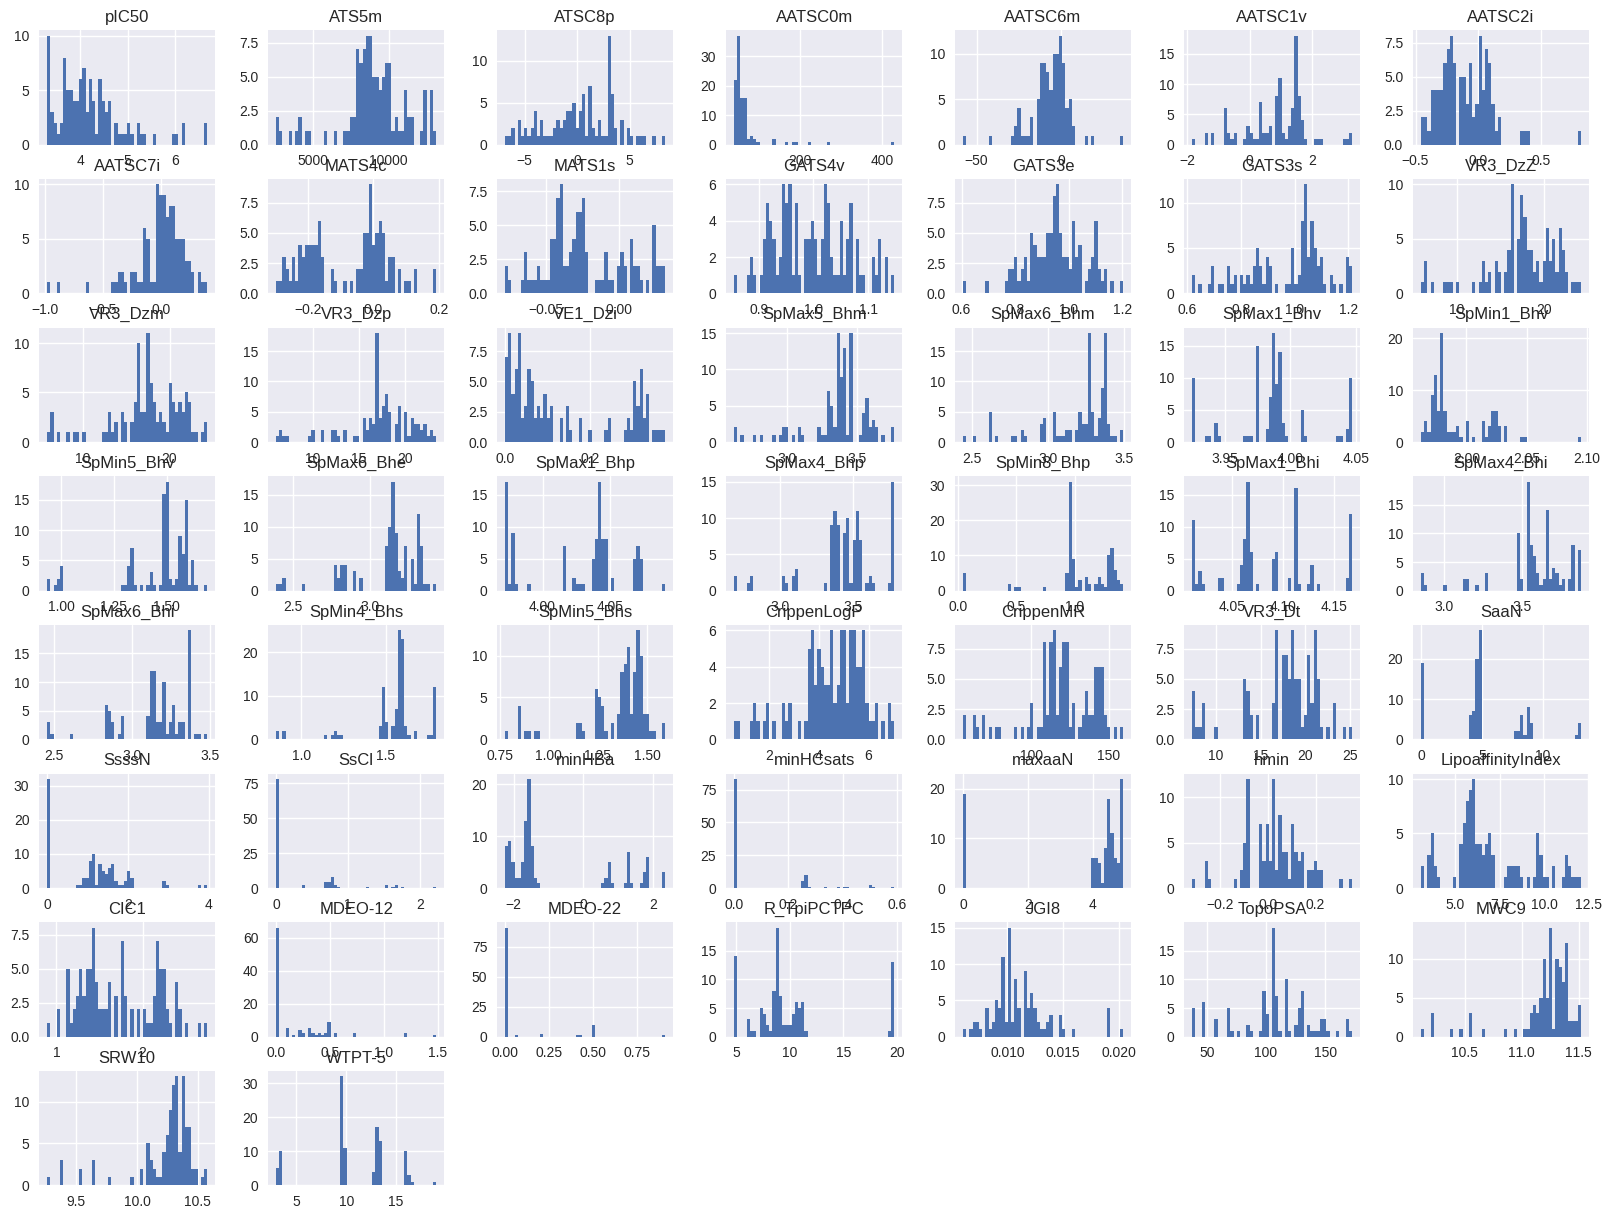

In [ ]:
df2.hist(bins = 50, figsize=(20,15))
plt.show()

** Initiation of Randorm Forest Regressor**

In [ ]:
model = DecisionTreeRegressor(random_state=seed)

In [ ]:
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
model.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)

In [ ]:
print(Y_train_pred)

[4.47638358 3.77177935 3.92009553 3.79904012 4.49214413 3.7457904
 6.00877392 4.19845909 3.30103    3.30103    4.3580304  4.38352449
 3.72149791 3.61751468 3.51467615 4.52418359 4.00678428 4.77650406
 3.30103    4.08570789 3.82145468 5.9625735  3.30103    3.90840338
 3.67448434 3.67672727 5.2823295  4.92226882 4.09194413 3.90538914
 3.65375845 3.62778785 3.9777779  4.82798119 3.91689172 4.59567953
 3.4921711  3.80604102 5.21467017 4.08570789 3.99182582 3.40659208
 3.91793307 4.99139983 4.04229696 3.30103    4.04987865 4.76170293
 4.19599695 4.1650709  4.40826776 4.24641694 4.27408837 3.30103
 4.21846003 4.26392236 3.66366036 6.6777807  5.06550155 4.26416167
 4.40682474 6.16115091 4.5516029  5.34872199 3.30103    4.43746923
 3.68314937 6.18045606 3.42010213 4.87745648 3.88505558 3.46890445
 3.41803897 3.30103    3.65375845 4.18708664 3.30103    5.58670024
 4.06696851 4.63189915 4.14484442 4.45407467 4.11798804 4.39329626
 5.04431225]


In [ ]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})

In [ ]:
predictions1

,Y_train,Y_train_pred
67,4.476384,4.476384
26,3.771779,3.771779
22,3.920096,3.920096
31,3.799040,3.799040
56,4.492144,4.492144
...,...,...
71,4.144844,4.144844
14,4.454075,4.454075
92,4.117988,4.117988
51,4.393296,4.393296


In [ ]:
len(Y_train_pred)

85

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train))

The training r_sq is: 1.0000


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_pred))

The MAE is: 0.0006


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

The RMSE is: 0.0028


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_pred))

The EVS is: 1.0000


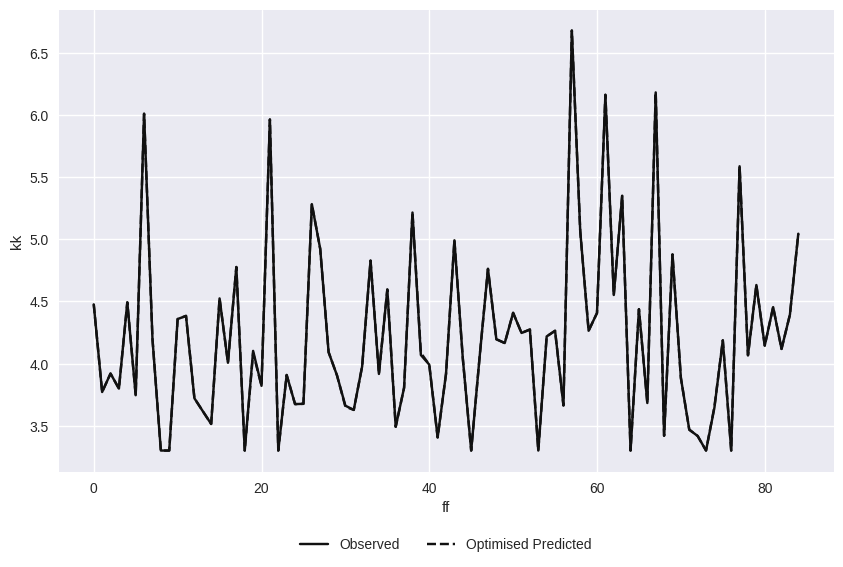

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_pred, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('kk')
plt.xlabel('ff')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
Y_test_pred

array([4.19599695, 3.91793307, 4.06696851, 3.7457904 , 4.14484442,
       4.99139983, 3.77177935, 3.66366036, 4.99139983, 3.66366036,
       4.19599695, 4.06696851, 3.42010213, 3.30103   , 3.91689172,
       4.92226882, 4.87745648, 4.19599695, 4.19599695, 3.4921711 ,
       4.21846003, 3.51467615])

In [ ]:
len(Y_test_pred)

22

In [ ]:
predictions2 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})

In [ ]:
predictions2

,Y_test,Y_test_pred
76,4.387216,4.195997
10,3.959279,3.917933
4,4.070837,4.066969
99,3.653686,3.745790
70,4.049246,4.144844
66,4.617983,4.991400
30,3.698471,3.771779
45,3.776946,3.663660
94,6.657577,4.991400
11,4.249106,3.663660


In [ ]:
print('The testing r_sq is: %.4f'% r2_score(Y_test, Y_test_pred))

The testing r_sq is: 0.3797


In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test))

The testing r_sq is: 0.3797


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_pred))

The MAE is: 0.3588


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

The RMSE is: 0.5327


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_pred))


The EVS is: 0.4313


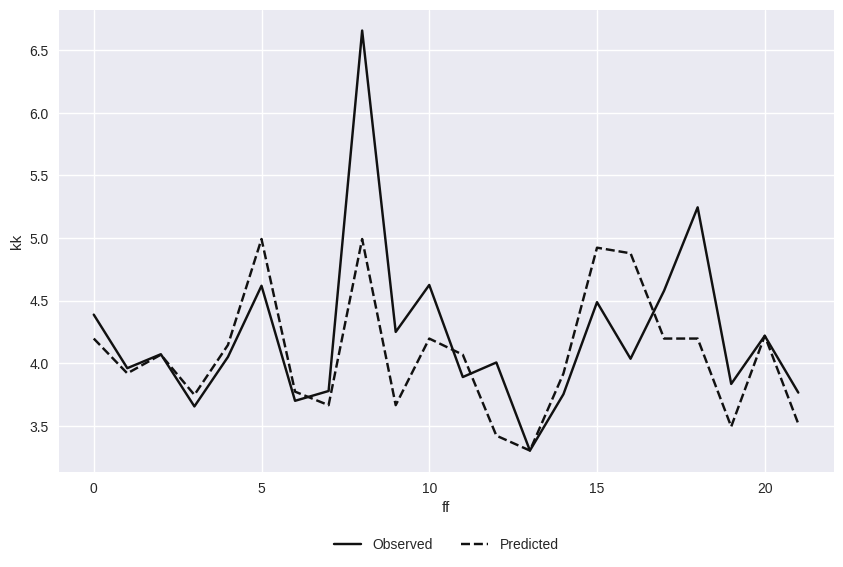

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('kk')
plt.xlabel('ff')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

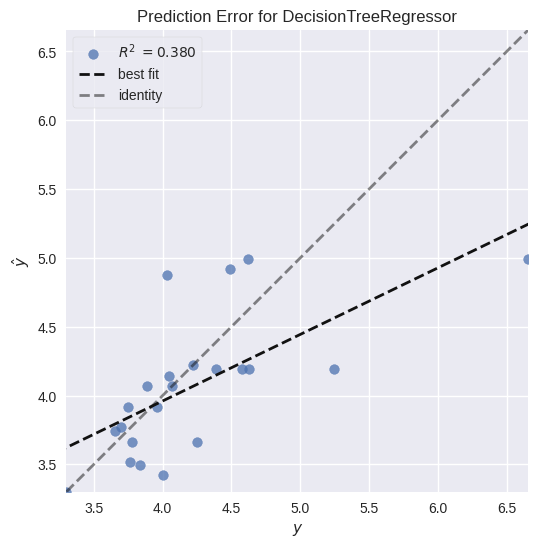

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

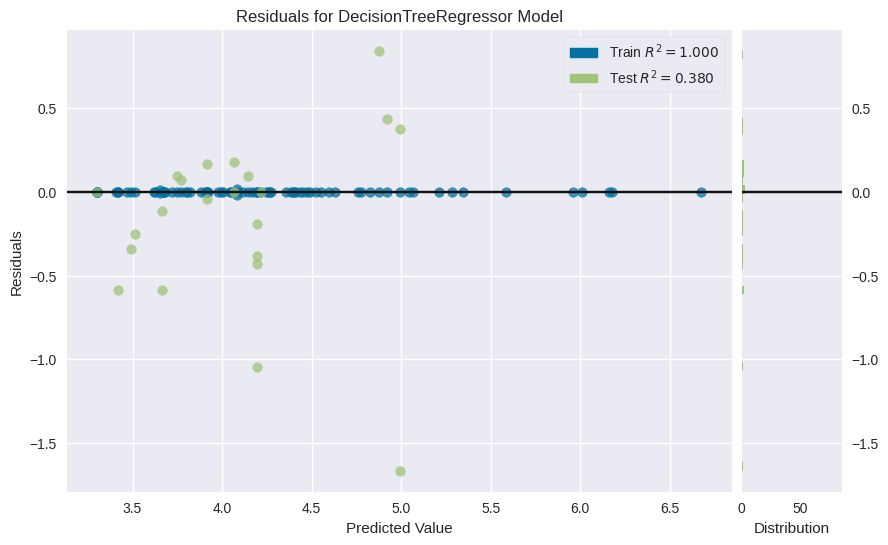

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

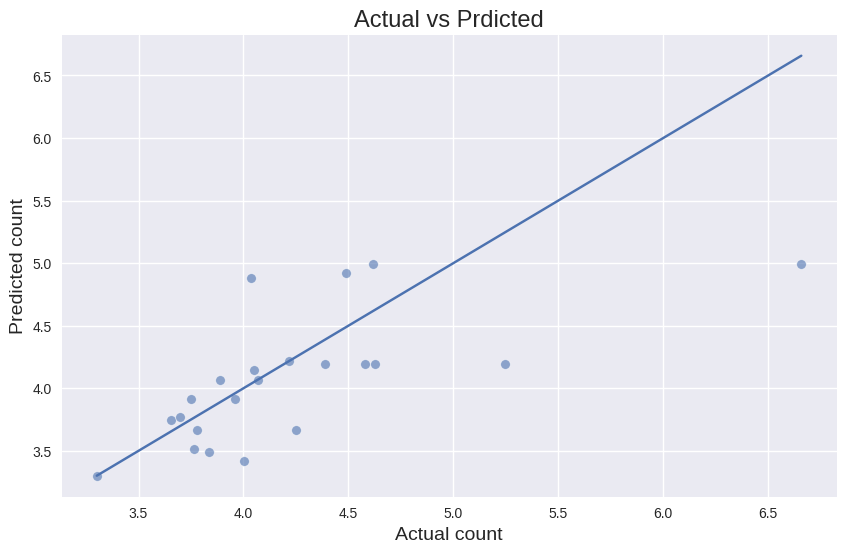

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_pred, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Prdicted', fontsize = 17)
plt.show()

In [ ]:
model.score(X_test, Y_test)

0.37967038189669655

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.53

**Using Different Hyperparameters**

In [ ]:
my_param_grid = {'n_estimators':[10, 100, 500], 'max_features':['sqrt', 'log2'], 'max_depth': [5,10,20]} 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GridSearchCV(estimator=RandomForestRegressor(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=3)

In [ ]:
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.318 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.807 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.386 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.044 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.168 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.297 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.811 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.593 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.144 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.156 total time=  

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=3)

In [ ]:
grid.best_params_

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 10}

In [ ]:
print(grid.best_estimator_)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=10,
                      random_state=42)


**Test with Hyperparameters**

In [ ]:
Y_test_optimised = grid.predict(X_test)

In [ ]:
Y_test_optimised

array([4.41159381, 3.84994036, 3.80393329, 4.99315227, 4.4340602 ,
       4.95608668, 4.06631637, 4.11914438, 5.14036872, 3.77869499,
       4.49395914, 3.84264233, 3.47835097, 3.40369074, 3.89745932,
       4.96010481, 4.76851262, 4.65896673, 4.52665327, 3.95110246,
       3.92689849, 3.98591093])

In [ ]:
predictions2['Y_test_optimised'] = Y_test_optimised
predictions2.head()

,Y_test,Y_test_pred,Y_test_optimised
76,4.387216,4.195997,4.411594
10,3.959279,3.917933,3.849940
4,4.070837,4.066969,3.803933
99,3.653686,3.745790,4.993152
70,4.049246,4.144844,4.434060


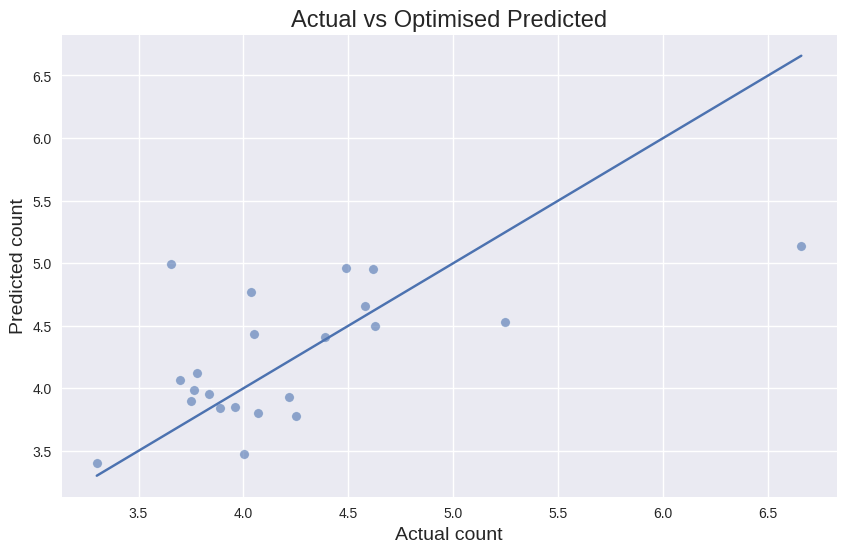

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_optimised, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
grid.score(X_test, Y_test)

0.33651002253180007

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_optimised)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.55

In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test_optimised))

The testing r_sq is: 0.4342


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_optimised))

The MAE is: 0.3976


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_optimised)))

The RMSE is: 0.5509


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_optimised))

The EVS is: 0.3381


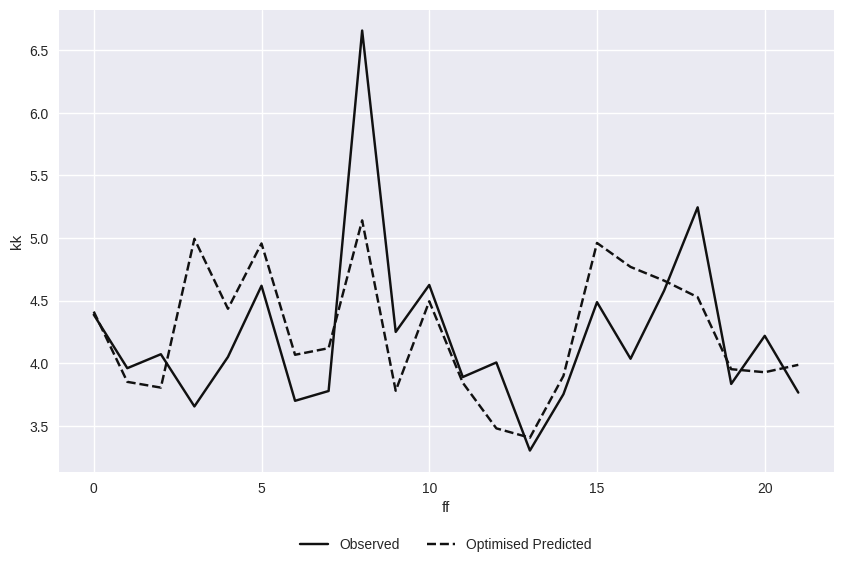

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('kk')
plt.xlabel('ff')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

**Train with hyperparameters**

In [ ]:
Y_train_optimised = grid.predict(X_train)

In [ ]:
Y_train_optimised

array([4.41415091, 3.84146818, 4.02722596, 3.76521516, 4.44919812,
       3.71842028, 5.70813387, 4.09226898, 3.3115862 , 3.3115862 ,
       3.94866906, 4.75905715, 4.07689724, 3.59575407, 3.73896562,
       4.4270156 , 3.97852516, 4.80895631, 3.3115862 , 4.11922852,
       3.98843802, 5.45065071, 3.59952881, 4.05085627, 3.78649717,
       3.70508859, 4.88857705, 4.96010481, 4.01357682, 3.86998374,
       3.69859076, 3.78281575, 3.92818976, 4.55263419, 3.85586295,
       4.62683624, 3.7656974 , 3.62068529, 5.44039159, 4.11922852,
       3.97254178, 3.39603587, 3.82653262, 4.92279224, 4.28376379,
       3.54948492, 4.23101521, 4.49158505, 4.18921671, 4.2151463 ,
       4.47166211, 4.31674638, 4.65079472, 3.30103   , 4.1291239 ,
       4.26236956, 3.76061187, 5.82406428, 5.01191513, 4.34416724,
       4.31524713, 5.95683462, 4.54370611, 5.18184739, 3.37547971,
       4.33681685, 3.84751735, 5.91290316, 3.43692105, 4.69167448,
       3.93646321, 3.48946244, 3.76236279, 3.30103   , 3.69859

In [ ]:
predictions1['Y_train_optimised'] = Y_train_optimised
predictions1

,Y_train,Y_train_pred,Y_train_optimised
67,4.476384,4.476384,4.414151
26,3.771779,3.771779,3.841468
22,3.920096,3.920096,4.027226
31,3.799040,3.799040,3.765215
56,4.492144,4.492144,4.449198
...,...,...,...
71,4.144844,4.144844,4.315270
14,4.454075,4.454075,4.359510
92,4.117988,4.117988,4.350637
51,4.393296,4.393296,4.399331


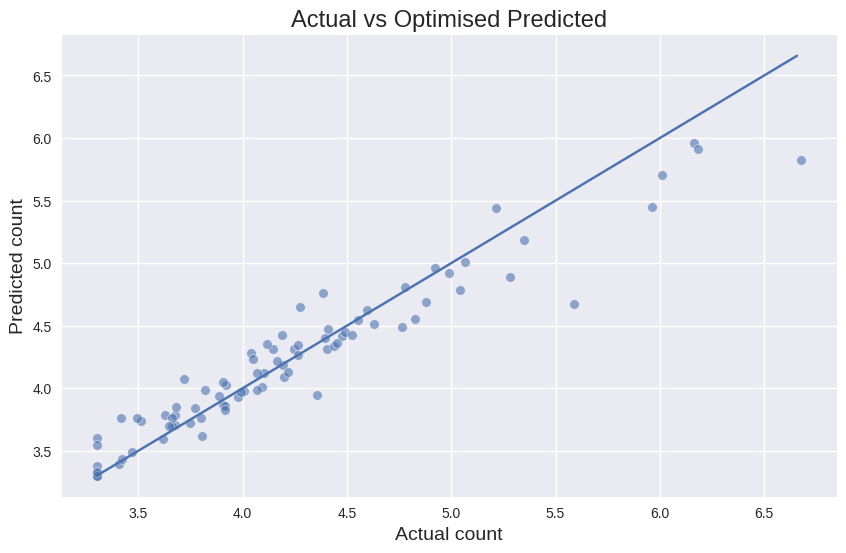

In [ ]:
sns.scatterplot(x=Y_train, y=Y_train_optimised, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train_optimised))

The training r_sq is: 0.8740


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_optimised))

The MAE is: 0.1443


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_optimised)))

The RMSE is: 0.2181


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_optimised))

The EVS is: 0.9118


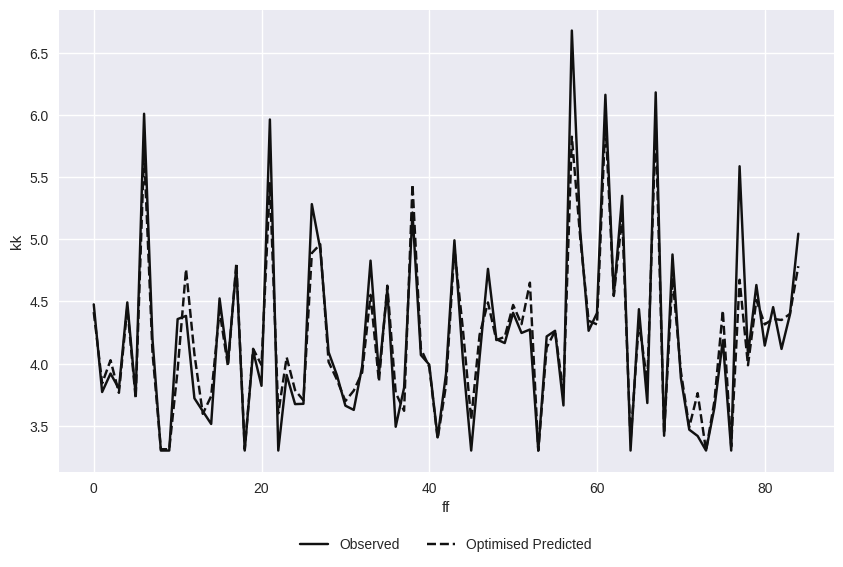

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('kk')
plt.xlabel('ff')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
# adfasd
param_dist = {
'n_estimators': list(range(50, 70, 10)),
'min_samples_leaf': list(range(1, 10)),
'max_depth': list(range(2, 10)),
'max_features': ['auto', 'sqrt'],
'bootstrap': [True, False]}

In [ ]:
GridSearchCV(estimator=RandomForestRegressor(random_state=seed), param_grid = param_dist, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [50, 60]},
             verbose=3)

In [ ]:
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=seed), param_grid = param_dist, refit = True, verbose = 3, cv=5)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.294 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.642 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.616 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.208 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.159 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=60;, score=0.298 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=60;, score=0.660 total time=   0.1s
[CV 3/5] END bootstrap=Tru

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [50, 60]},
             verbose=3)

In [ ]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'n_estimators': 50}

In [ ]:
from sklearn import tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = tree.DecisionTreeRegressor()

In [ ]:
model.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)

In [ ]:
features = X_train.columns.tolist()

In [ ]:
import graphviz

In [ ]:
tree = tree.export_graphviz(model, max_depth = 10, out_file = None, feature_names = features, class_names = ['paid', 'default'], proportion = True, filled = True)


In [ ]:
graph = graphviz.Source (tree, format = "png")


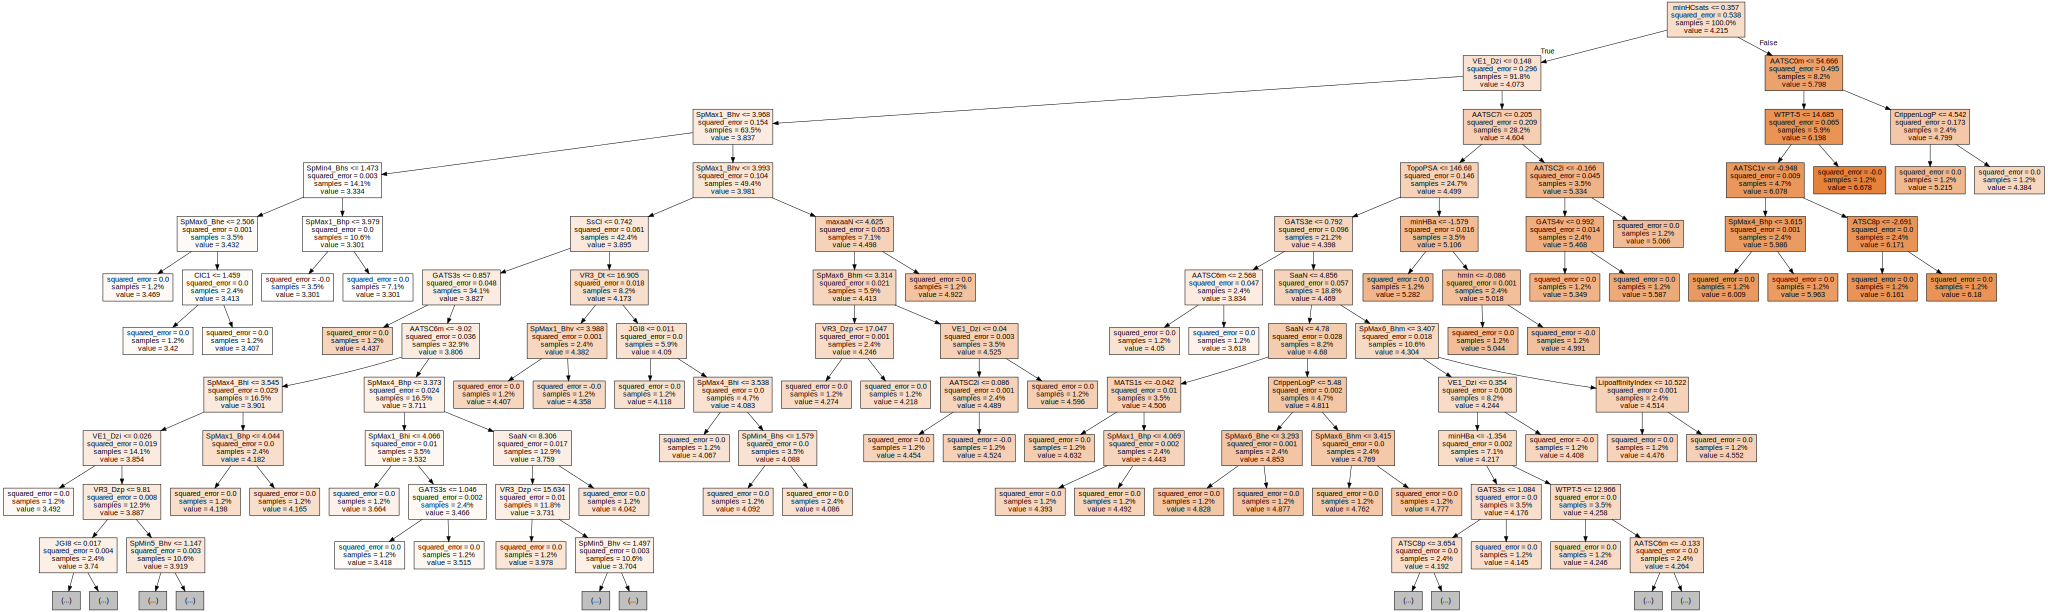

In [ ]:
graph

In [ ]:
features = list(X_train.columns)

In [ ]:
features

In [ ]:
RFR = RandomForestRegressor(random_state=seed, n_estimators = 100, max_features='sqrt', max_depth=10)

In [ ]:
RFR.fit(X_train, Y_train)

In [ ]:
importance = RFR.feature_importances_
importance

In [ ]:
FIM = pd.DataFrame({'features' : features, 'feature_importances' : importance})
FIM

In [ ]:
fig = plt.figure(dpi=800)
plt.figure(figsize=(10,20))
plt.title('feature importances')
sns.barplot(y='features', x='feature_importances', data=FIM)
plt.show()

In [ ]:
!pip install shap

In [ ]:
import shap
X = df2.drop(['pIC50'],axis = 1)
explainer = shap.TreeExplainer(model,feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X)

In [ ]:
plt.figure(dpi=300)
shap.summary_plot(shap_values, X,show=False,color_bar=False)
plt.xlabel("SHAP value of pIC50 model" ,fontweight='bold',fontsize=6)
plt.tick_params(labelsize=6,)
plt.show()